# PART1

Index(['NumberOfSectons', 'TimeDateStamp', 'PointerToSymbolTable',
       'NumberOfSybols', 'SizeOfOptionalHeader', 'Characteristics', 'Magic',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializeData', 'SizeOfUninitalizeData', 'AddressOfEntryPoint',
       'BaseOfCode', 'BaseOfData', 'ImageBase', 'sectionAlignment',
       'FileAlignment', 'MajorOperationSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsytemVersion', 'MinorSubsytemVersion', 'Reserved1',
       'SizeOfImage', 'SimzeOfHeaders', 'CheckSum', 'DllCharacteristics',
       'SizeOfStackRserve', 'SizeofStackCommit', 'SizeOfHeapRserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'e_meagic',
       'e_lfanew'],
      dtype='object')
Number of malware:  6995
Number of benign:  2999
       NumberOfSectons  TimeDateStamp  PointerToSymbolTable  NumberOfSybols  \
count      9994.000000   9.994000e+03          9.99

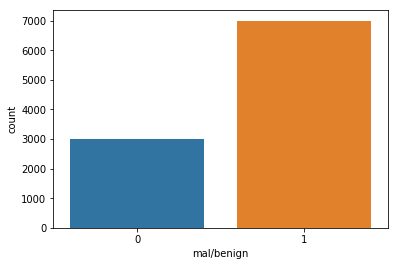

In [2]:
import pandas as pd
import seaborn as sns

features_path = '../features.csv'

data = pd.read_csv(features_path)
X = data.drop(['filename', 'mal/benign'], axis=1)
y = data['mal/benign']

before_col = X.columns
print(before_col)

ax = sns.countplot(y, label="Count")
B, M = y.value_counts()
print("Number of malware: ", B)
print("Number of benign: ", M)

print(X.describe())

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]), <a list of 37 Text xticklabel objects>)

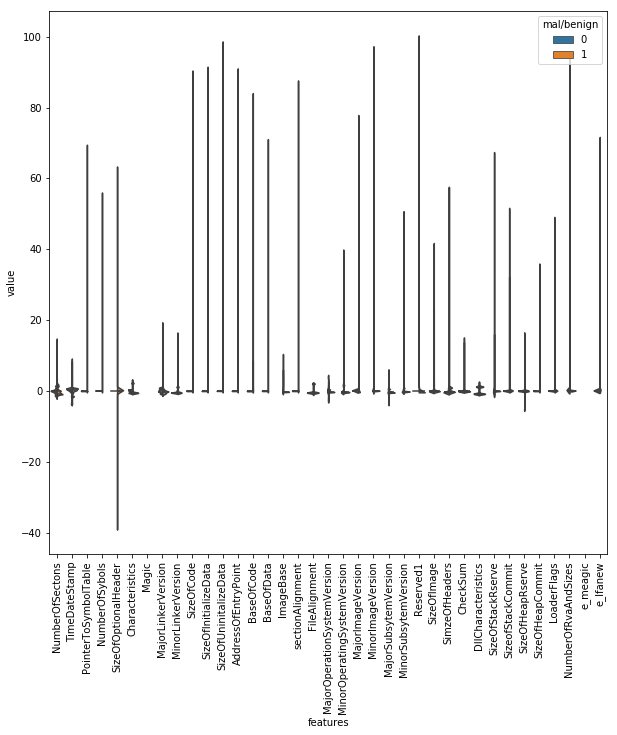

In [9]:
import matplotlib.pyplot as plt
# first ten features
data_dia = y
data = X
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:37]],axis=1)
data = pd.melt(data,id_vars="mal/benign",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="mal/benign", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

# PART2
reference: https://www.kaggle.com/residentmario/automated-feature-selection-with-sklearn

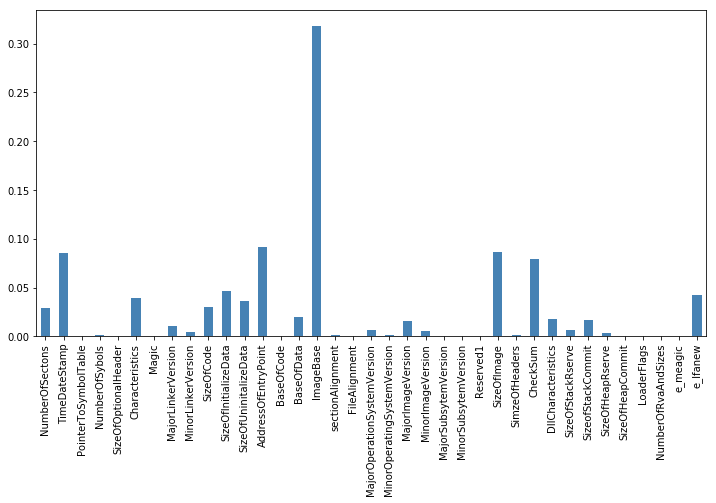

In [13]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

features_path = '../features.csv'

data = pd.read_csv(features_path)
X = data.drop(['filename', 'mal/benign'], axis=1)
y = data['mal/benign']

clf = DecisionTreeClassifier()
clf.fit(X, y)

pd.Series(clf.feature_importances_, index=X.columns[:]).plot.bar(color='steelblue', figsize=(12, 6))

In [24]:
from sklearn.feature_selection import SelectFromModel

clf = DecisionTreeClassifier()
trans = SelectFromModel(clf, threshold='median')
X_trans = trans.fit_transform(X, y)
print("We started with {0} features but retained only {1} of them!".format(X.shape[1] - 1, X_trans.shape[1]))

We started with 36 features but retained only 19 of them!


In [33]:
import pandas as pd
df = pd.DataFrame(X_trans)
df['mal/benign'] = y
df.to_csv('transform_features.csv', index=False)